<a href="https://colab.research.google.com/github/NoelleI/Udacity-Deployment/blob/master/Heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:


'''Step 1 Detect Skin 
this code was adapted from https://www.pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
and
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/'''

# import the necessary packages
import imutils
import numpy as np
import argparse
import cv2
from matplotlib import pyplot
from google.colab.patches import cv2_imshow


# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'

#take out the skin detection:
lower = np.array([0, 0, 0], dtype = "uint8")
upper = np.array([255, 255, 255], dtype = "uint8")

#include the skin detection:
#lower = np.array([0, 48, 80], dtype = "uint8")
#upper = np.array([20, 255, 255], dtype = "uint8")



camera = cv2.VideoCapture("IMG_4327.MOV")  
n_frames = int(camera.get(cv2.CAP_PROP_FRAME_COUNT))
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(n_frames)




ra = []
ga = []
ba = []
box = []

# keep looping over the frames in the video
for i in range(n_frames):
    
    print(i)
	# grab the current frame
    (grabbed, frame) = camera.read()
	# if we are viewing a video and we did not grab a
	# frame, then we have reached the end of the video
	# resize the frame, convert it to the HSV color space,
	# and determine the HSV pixel intensities that fall into
	# the speicifed upper and lower boundaries
    if grabbed:
        frame = imutils.resize(frame, width = 400)
        frame = imutils.rotate(frame, 180)
        converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        skinMask = cv2.inRange(converted, lower, upper)
	# apply a series of erosions and dilations to the mask
	# using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        skinMask = cv2.erode(skinMask, kernel, iterations = 2)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
	# blur the mask to help remove noise, then apply the
	# mask
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        skin = cv2.bitwise_and(frame, frame, mask = skinMask)

        bboxes = classifier.detectMultiScale(skin, 1.05, 8)
        print('len bboxes:', len(bboxes))
        if box == []:  
          if len(bboxes) ==0:
            print("face not detected in first frame")
            cv2_imshow(np.vstack([frame, skin]))  ##change to an assert later
          else:
            box = bboxes[0]
#choose the box most like the last frame, if more than one box. If zero boxes, use box from last frame
        else:
          if len(bboxes) ==0:
            box = box   
            print("old box used") 
          else:
           test2 = np.zeros(len(bboxes))
           for i, boxnew in enumerate(bboxes):
            [xn, yn, widthn, heightn] = boxnew 
            x2n = xn + widthn
            y2n = yn + heightn
           	# draw a rectangle mask and compare to box from previous frame
            tempn = np.zeros([frame.shape[0], frame.shape[1]])
            tempn = tempn.astype(np.uint8)
            cv2.rectangle(tempn, (xn, yn), (x2n, y2n), (255,255,255), -1)
            test = cv2.bitwise_and(temp, temp, mask = tempn)
            test2[i] = np.mean(test)
           boxt = bboxes[np.argmax(test2)]
           if boxt[3] <= width*0.9 or boxt[3] >= width*1.1:
             box = box
             print("old box used")
             
           else:
             box = boxt
             print("nearest box used")
            
	# extract
        [x, y, width, height] = box 
        x2 = x + width
        y2 = y + height
        x2 = int(x2 - 0.2*width)
        x = int(x + 0.2*width)
        #y2 = int(y2 - 0.8*height)
           	# draw a rectangle over the pixels
        temp = np.zeros([frame.shape[0], frame.shape[1]])
        cv2.rectangle(temp, (x, y), (x2, y2), (255,255,255), -1)
        temp = temp/255
        temp = temp.astype(np.uint8)
        skin = cv2.bitwise_and(skin, skin, mask = temp)
        #cv2_imshow(np.vstack([frame, skin]))



        #find the average red, green and blue in the skin
        N = 0
        r=0
        g=0
        b=0
        skinr = skin[:,:,0].reshape(-1)
        sking = skin[:,:,1].reshape(-1)
        skinb = skin[:,:,2].reshape(-1)

        #print(skinMask.shape)
        for i, pixel in enumerate(skinMask.reshape(-1)):
          if  not pixel==0:
            r += skinr[i]
            g += sking[i]
            b += skinb[i]
            N+=1
        ra += [r/N] 
        ga += [g/N]
        ba += [b/N]




	# show the skin in the image along with the mask
      
        #cv2_imshow(np.vstack([frame, skin]))
# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

1858
0
len bboxes: 1
1
len bboxes: 1
nearest box used


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Streaming output truncated to the last 5000 lines.
nearest box used
192
len bboxes: 1
nearest box used
193
len bboxes: 1
nearest box used
194
len bboxes: 1
nearest box used
195
len bboxes: 1
nearest box used
196
len bboxes: 1
nearest box used
197
len bboxes: 1
nearest box used
198
len bboxes: 1
nearest box used
199
len bboxes: 1
nearest box used
200
len bboxes: 1
nearest box used
201
len bboxes: 1
nearest box used
202
len bboxes: 1
nearest box used
203
len bboxes: 1
nearest box used
204
len bboxes: 1
nearest box used
205
len bboxes: 1
nearest box used
206
len bboxes: 1
nearest box used
207
len bboxes: 1
nearest box used
208
len bboxes: 1
nearest box used
209
len bboxes: 1
nearest box used
210
len bboxes: 1
nearest box used
211
len bboxes: 1
nearest box used
212
len bboxes: 1
nearest box used
213
len bboxes: 1
nearest box used
214
len bboxes: 1
nearest box used
215
len bboxes: 1
nearest box used
216
len bboxes: 1
nearest box used
217
len bboxes: 1
nearest box used
218
len bboxes: 1
near

In [30]:
ra = np.array(ra)

In [31]:
np.argmin(ra)

1537

In [32]:
ra[np.argmin(ra)]

7.296122222222222

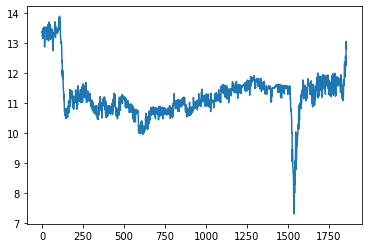

In [33]:
import matplotlib.pyplot as plt

plt.plot(ra)

In [34]:
ga = np.array(ga)
ba = np.array(ba)

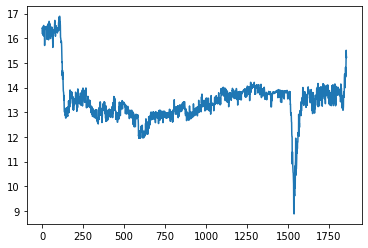

In [35]:
plt.plot(ga)

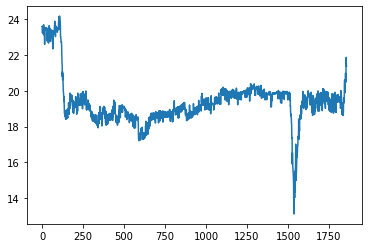

In [36]:
plt.plot(ba)

In [37]:
from sklearn.decomposition import FastICA
from scipy import signal
transformer = FastICA(n_components=3)

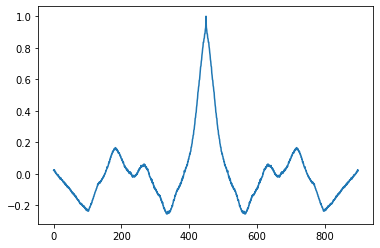

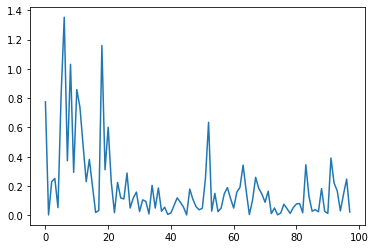

1.3527087958605395 1.15946325538189
waiting x1


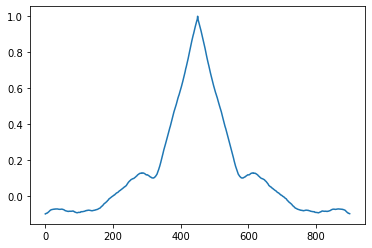

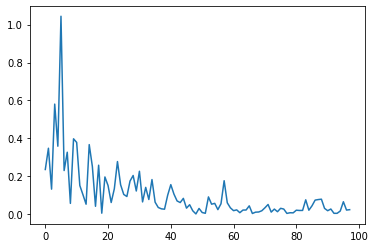

1.0443816127546213 0.3970322112213614
estimated heartrate x2 54.0


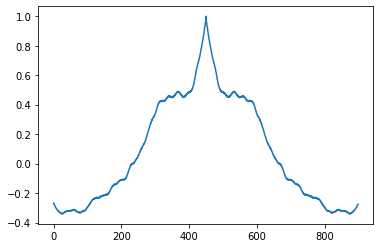

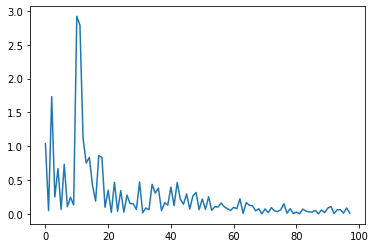

2.919901258111022 1.7342734214087232
estimated heartrate x0 64.0


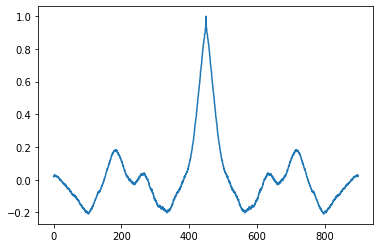

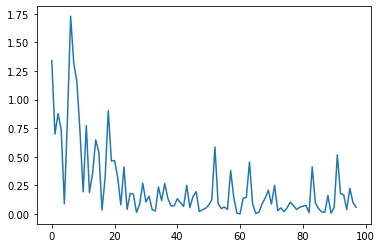

1.7291696091095123 1.3417697166208458
waiting x1


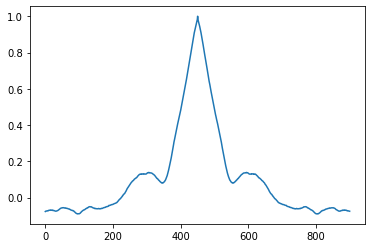

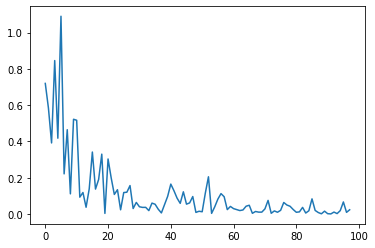

1.0904653666843394 0.7199971766639437
waiting x2


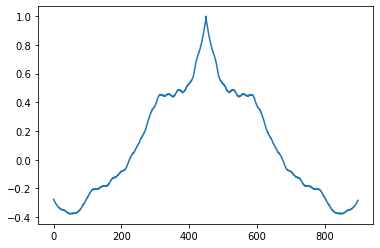

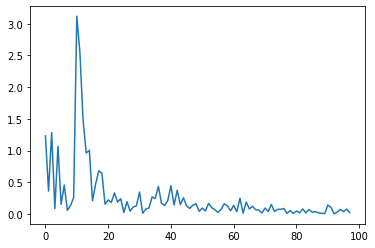

3.117511328320663 1.4768126593966082
estimated heartrate x0 64.0


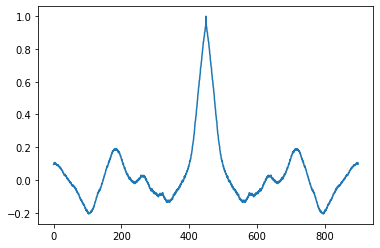

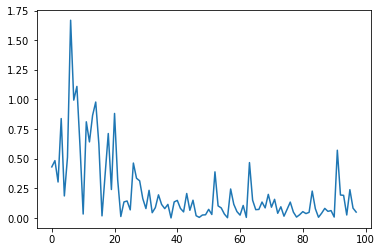

1.6684588387333505 1.1100293216126706
waiting x1


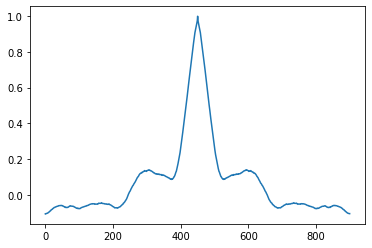

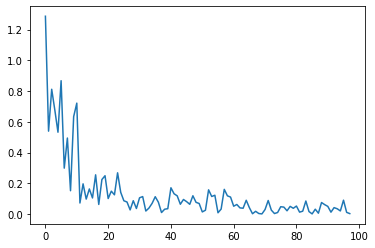

1.2872025584458662 0.8676548683348934
waiting x2


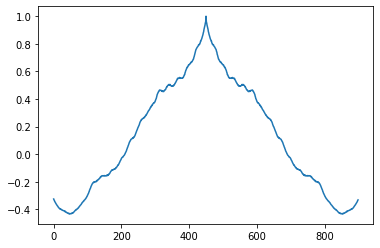

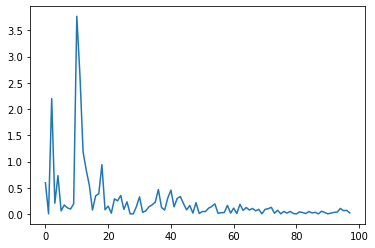

3.7694222949636553 2.198256661900889
estimated heartrate x0 64.0


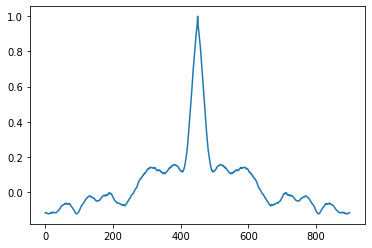

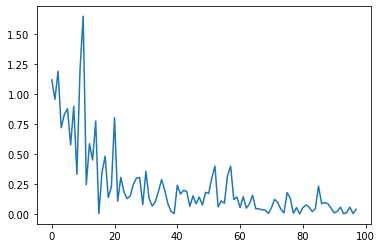

1.648837659929229 1.1916027588350406
waiting x1


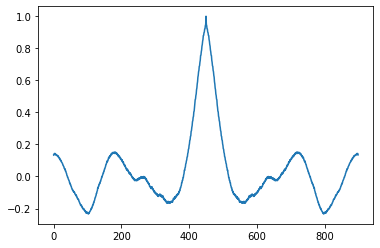

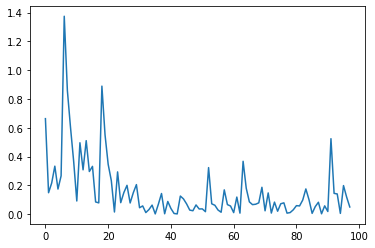

1.3743088268347456 0.8890687474182466
waiting x2


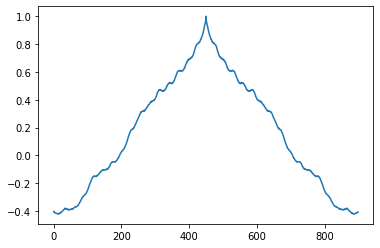

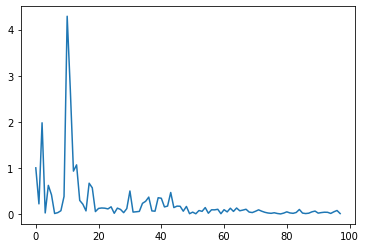

4.290785583712923 1.9781425018448846
estimated heartrate x0 64.0


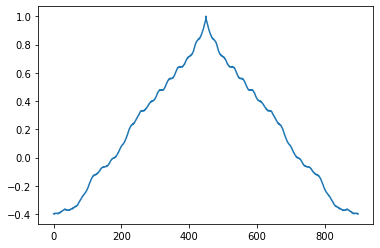

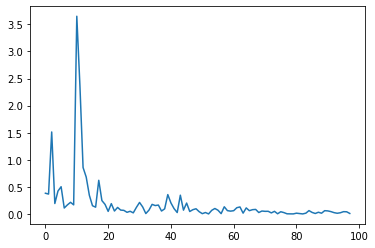

3.6505133108461036 1.5132003585784697
estimated heartrate x1 64.0


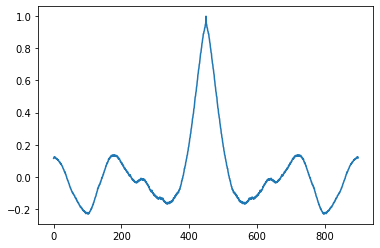

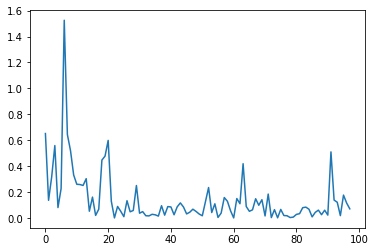

1.5258479168156782 0.6517336381152093
estimated heartrate x2 56.0


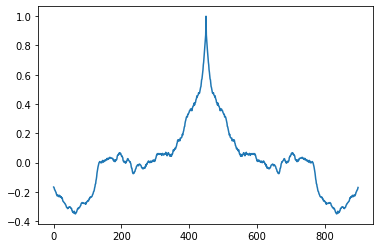

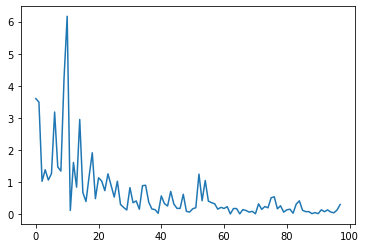

6.167698206152456 3.599840081202585
estimated heartrate x0 64.0


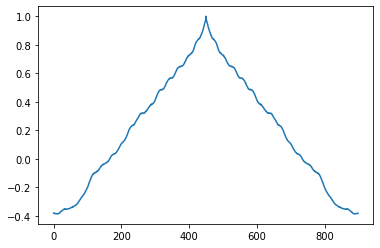

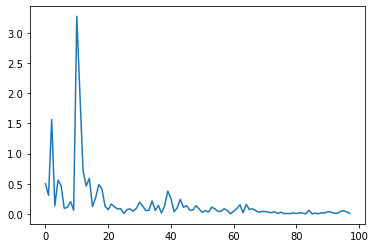

3.277526898085468 1.5658100105390316
estimated heartrate x1 64.0


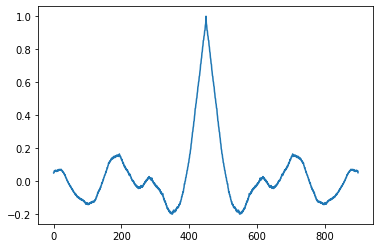

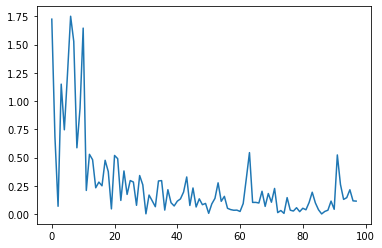

1.7498010534580644 1.7239217652108716
waiting x2


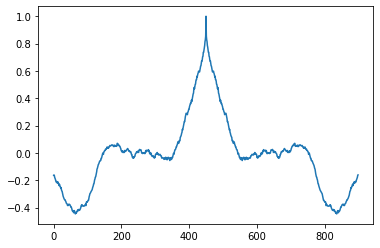

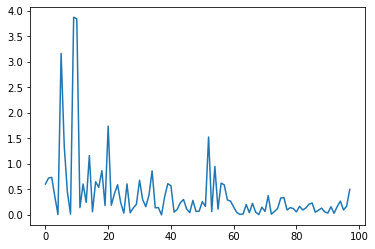

3.873416874431155 3.165622566805721
waiting x0


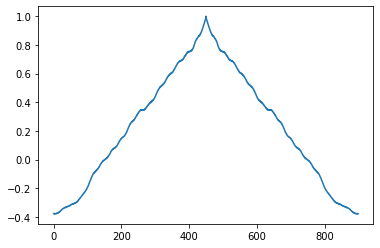

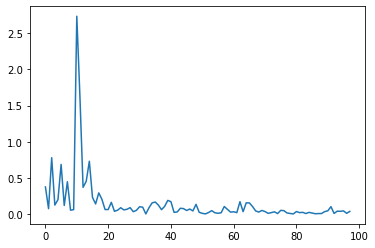

2.7362156627396685 0.778301340584733
estimated heartrate x1 64.0


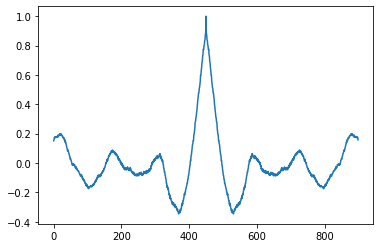

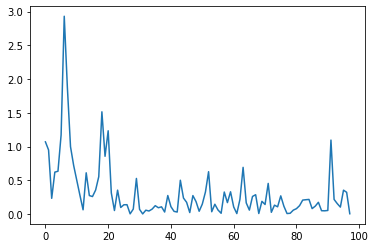

2.9303889921732718 1.5144982720027202
estimated heartrate x2 56.0


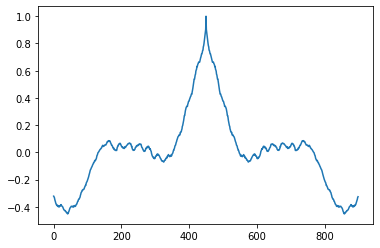

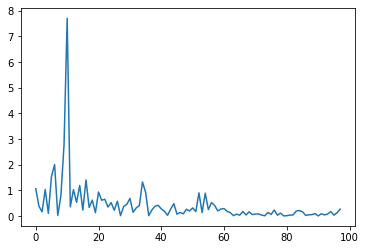

7.702538044102162 2.0003629177754267
estimated heartrate x0 64.0


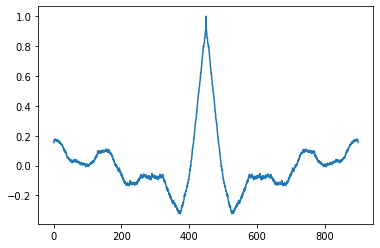

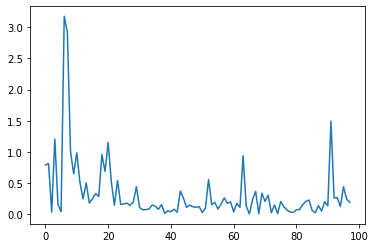

3.1781243462522992 1.4931381405162116
estimated heartrate x1 56.0


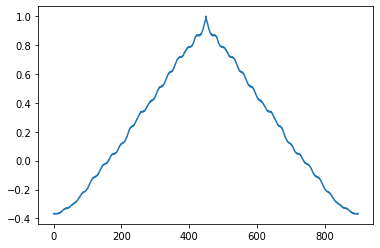

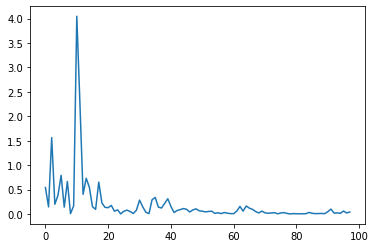

4.046349380259237 1.5631004941497841
estimated heartrate x2 64.0


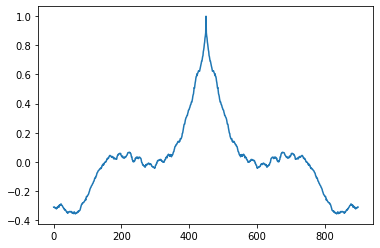

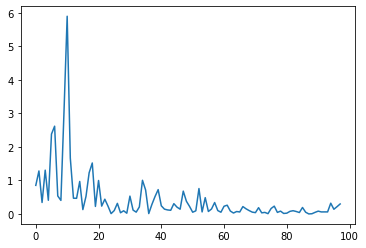

5.903121793353919 2.619949519504769
estimated heartrate x0 64.0


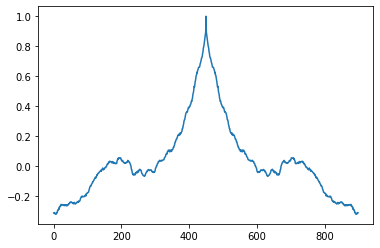

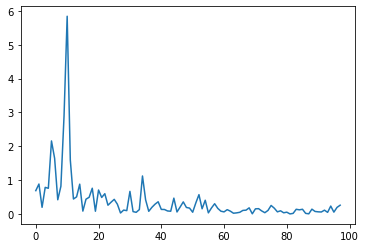

5.842115460862327 2.1573302833006682
estimated heartrate x1 64.0


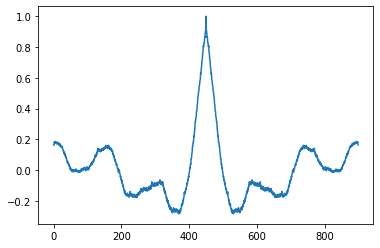

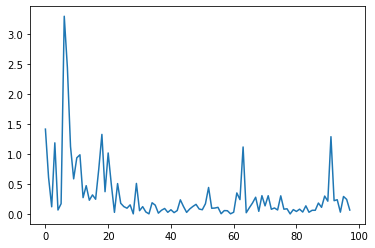

3.2999162690457107 1.4181557413975072
estimated heartrate x2 56.0


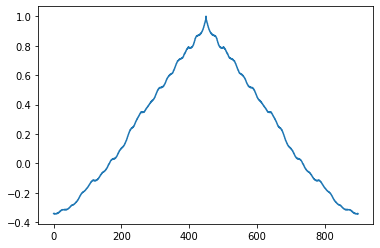

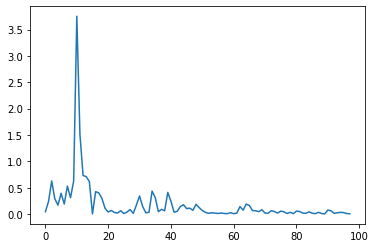

3.7526254480314134 0.7309968549870455
estimated heartrate x0 64.0


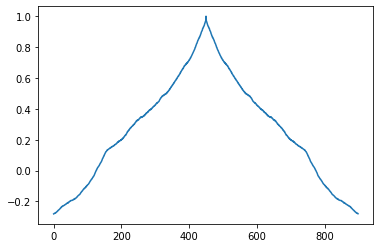

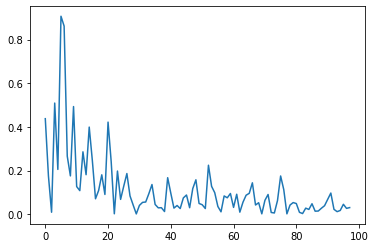

0.9066625051710215 0.4930326771779691
estimated heartrate x1 54.0


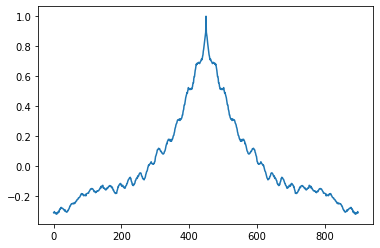

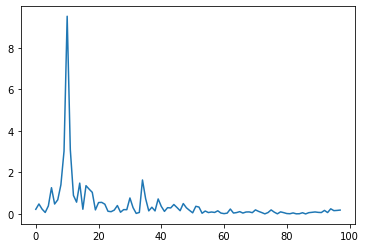

9.516340363648666 1.6347091481642715
estimated heartrate x2 64.0


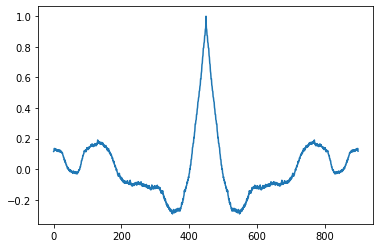

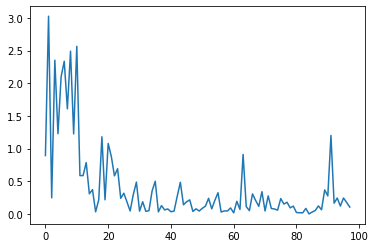

3.024416941091595 2.564729962117393
waiting x0


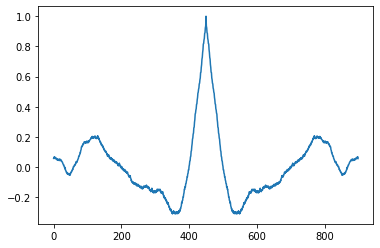

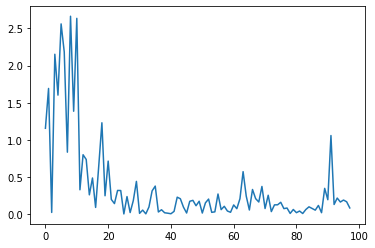

2.662798546210137 2.6344458020016988
waiting x1


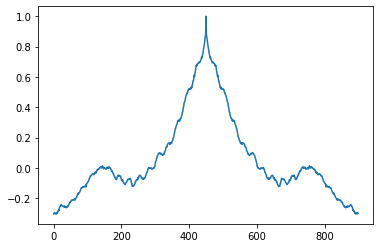

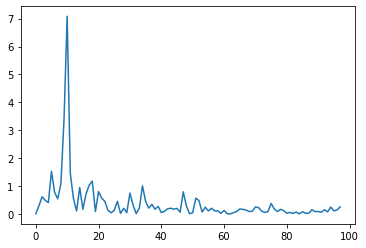

7.084701020998126 1.527649248711336
estimated heartrate x2 64.0


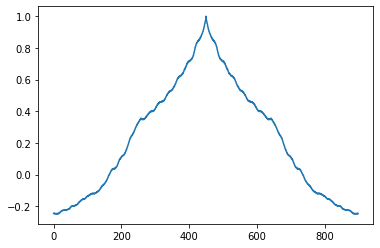

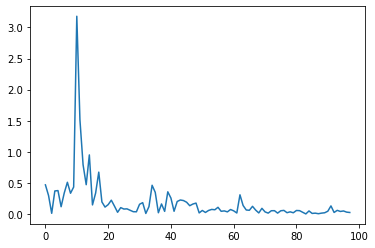

3.1806957594468153 0.9494199422266852
estimated heartrate x0 64.0


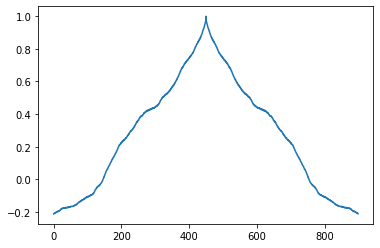

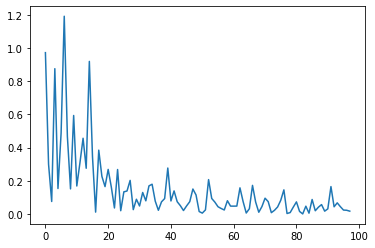

1.1906631146847464 0.9714060704367459
waiting x1


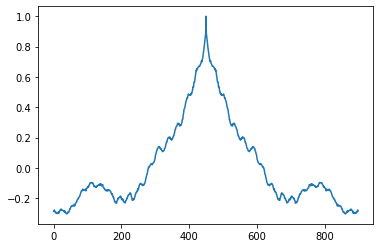

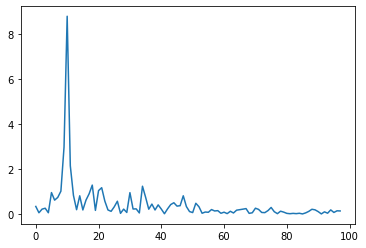

8.803910040639296 1.2851758822857426
estimated heartrate x2 64.0


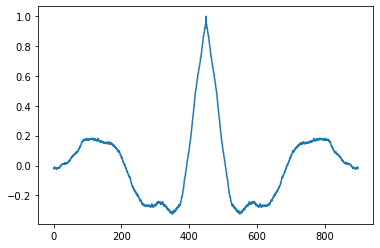

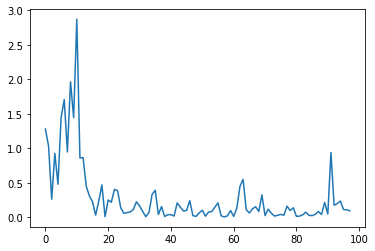

2.8688767297781386 1.7026908683948236
estimated heartrate x0 64.0


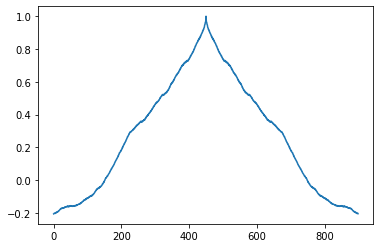

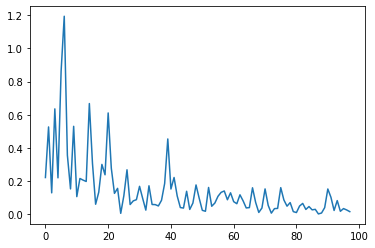

1.1946029499197321 0.6673178642174354
estimated heartrate x1 56.0


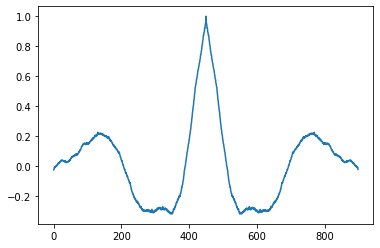

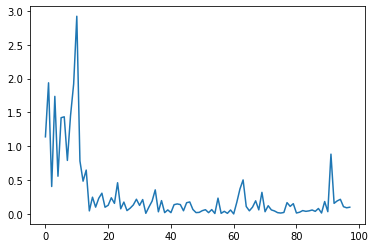

2.9217263624891987 1.9382356341703533
waiting x2


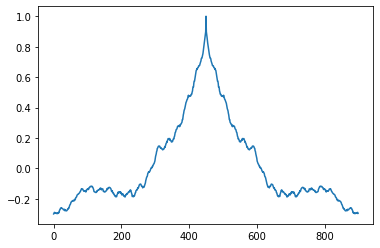

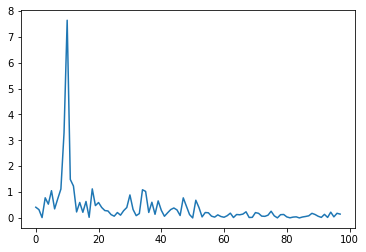

7.641582148458676 1.233889695289706
estimated heartrate x0 64.0


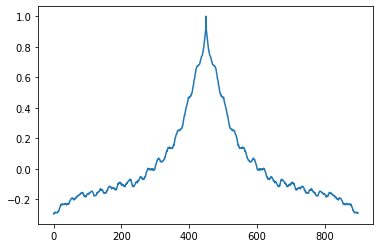

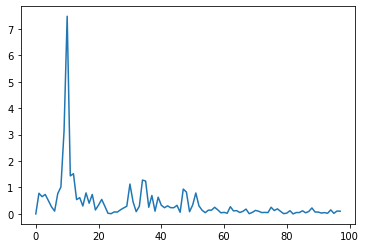

7.478980146352508 1.5219465749260688
estimated heartrate x1 64.0


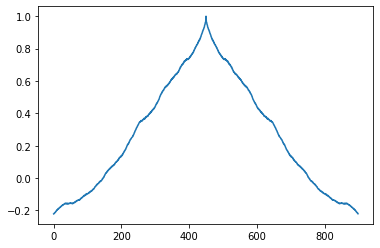

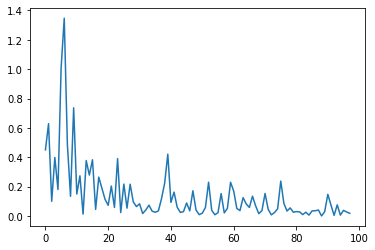

1.346647302626987 0.7368028000486389
estimated heartrate x2 56.0


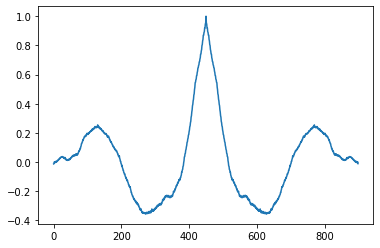

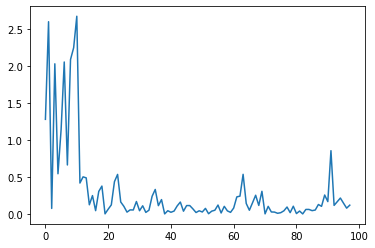

2.6744002576601145 2.60032465873172
waiting x0


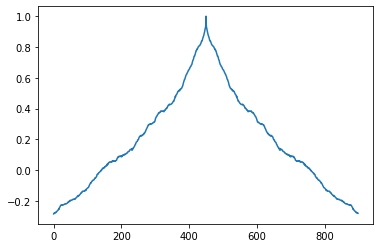

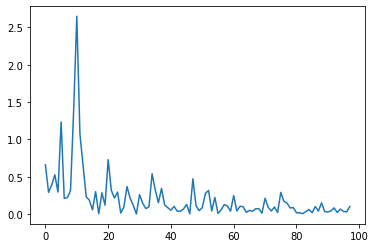

2.6499523824797935 1.2332930435984937
estimated heartrate x1 64.0


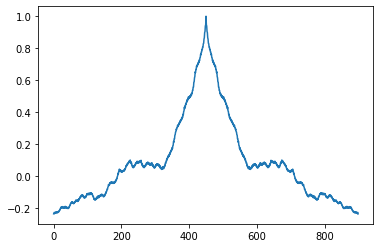

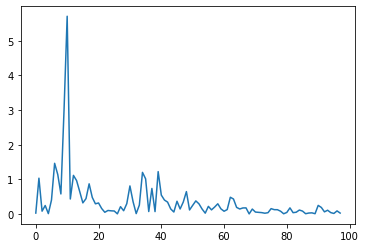

5.7084627248689195 1.463038155371668
estimated heartrate x2 64.0


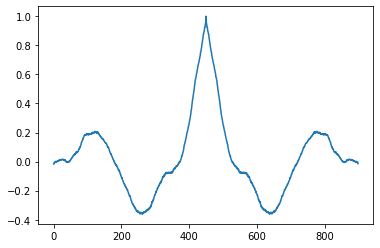

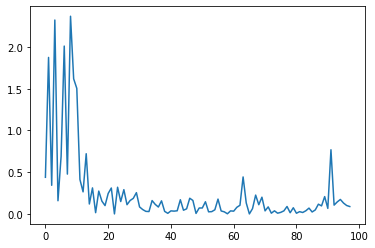

2.3683868245822697 2.3229578008570453
waiting x0


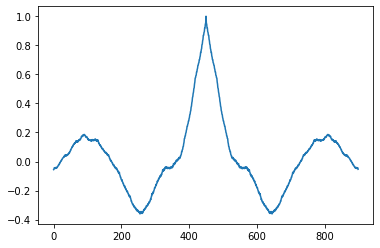

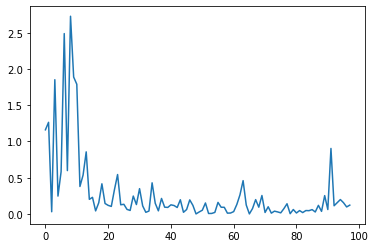

2.726696836136251 1.851280226390322
waiting x1


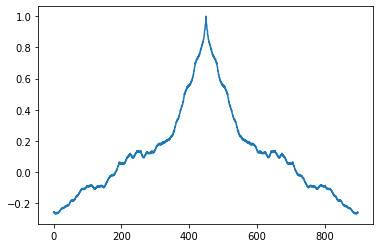

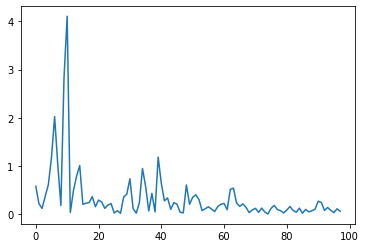

4.105517681081834 2.0222843348559842
estimated heartrate x2 64.0


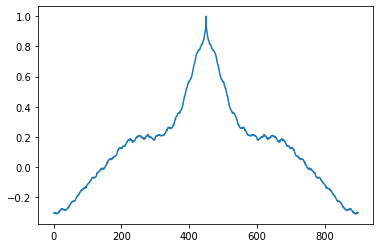

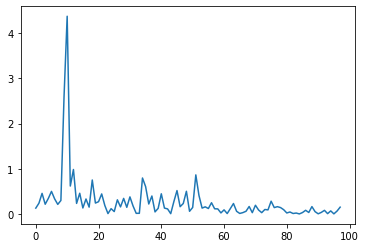

4.371510309966176 0.9832183501002397
estimated heartrate x0 64.0


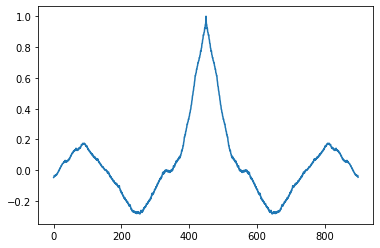

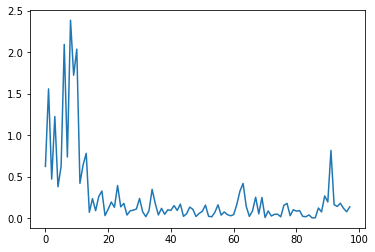

2.3835095097955104 2.0355705960147694
waiting x1


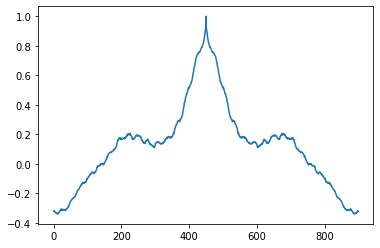

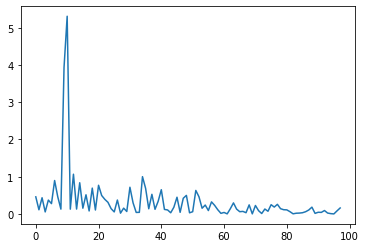

5.310223223293382 1.0669421203451934
estimated heartrate x2 64.0


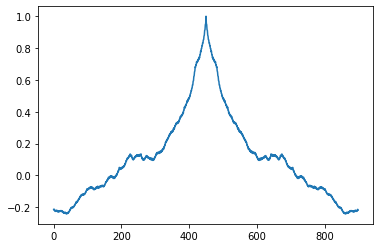

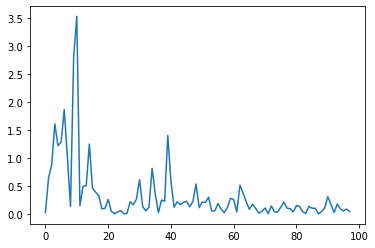

3.532463948794519 1.8671766126605918
estimated heartrate x0 64.0


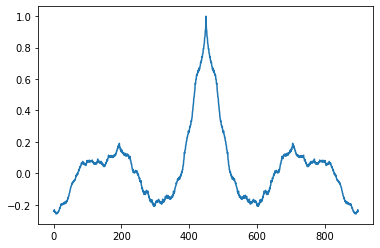

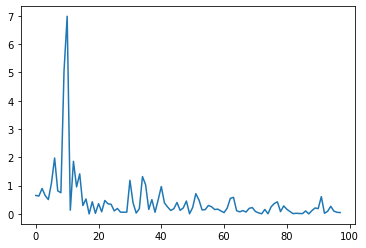

6.98658130055751 1.976738505305778
estimated heartrate x1 64.0


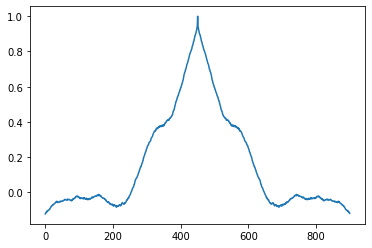

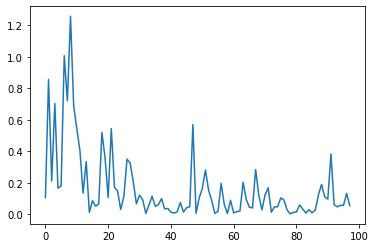

1.2585876201300545 0.8560617216358347
waiting x2


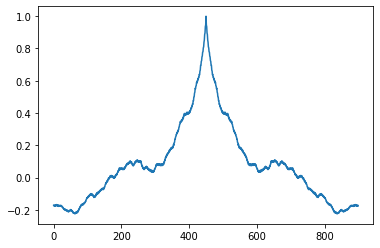

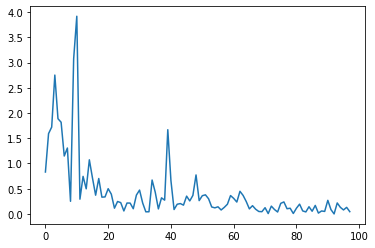

3.9186438029525936 2.752342906265427
waiting x0


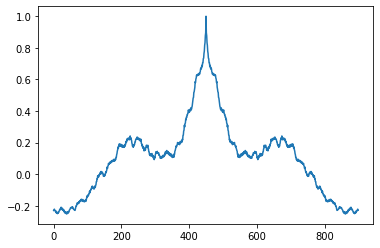

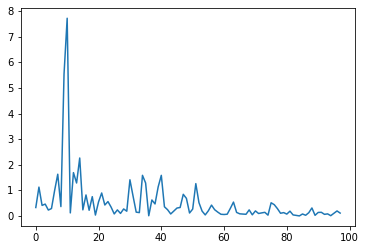

7.7239785297223005 2.2665393010815054
estimated heartrate x1 64.0


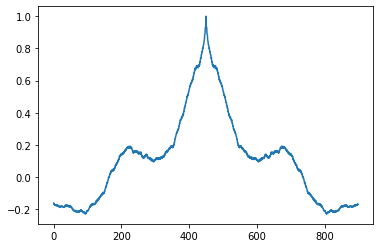

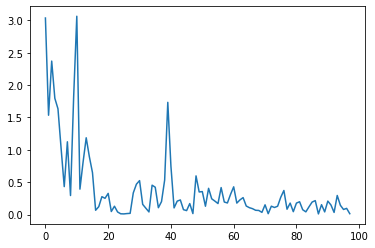

3.0627596266547705 3.03539601852357
waiting x2


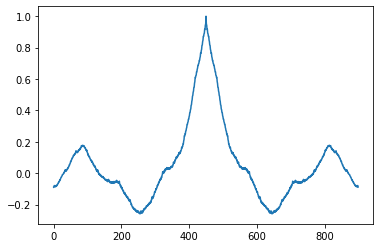

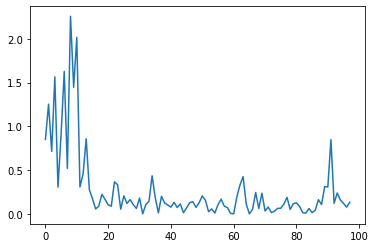

2.2562679084614228 2.015997088358796
waiting x0


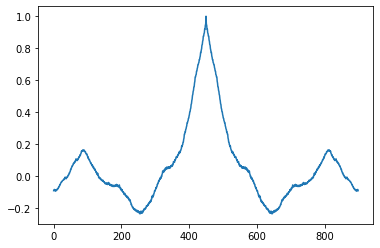

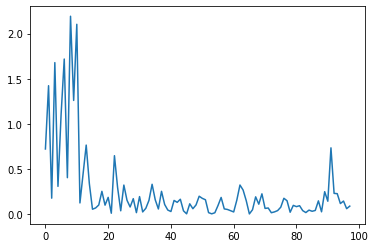

2.192820511472624 2.1035827694732765
waiting x1


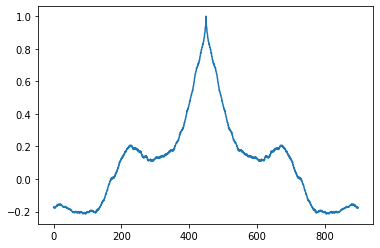

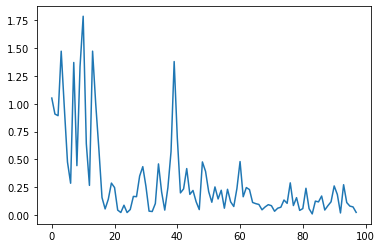

1.7878053526353597 1.4736356849021373
waiting x2


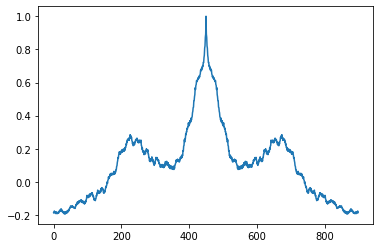

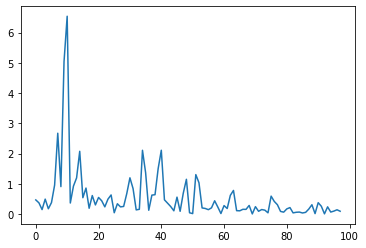

6.542422697902867 2.671216405338585
estimated heartrate x0 64.0


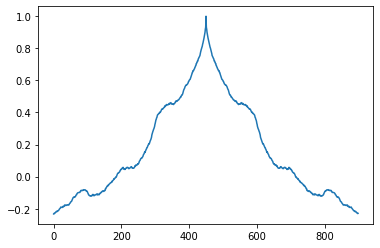

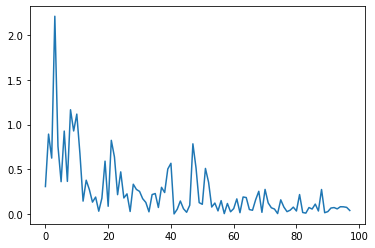

2.2118397724460923 1.1656585168872058
estimated heartrate x1 50.0


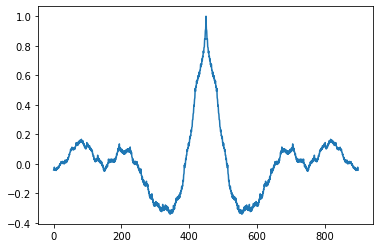

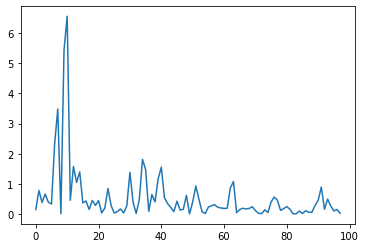

6.562070771808241 3.480336961869138
estimated heartrate x2 64.0


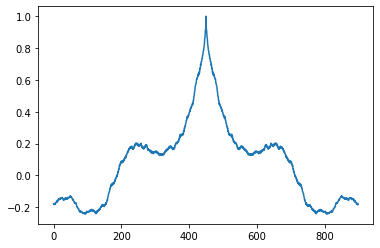

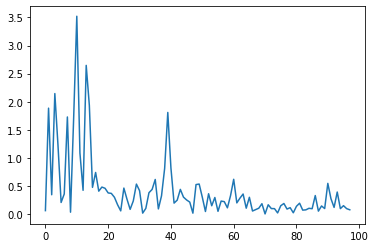

3.521438605292042 2.6471779298346303
waiting x0


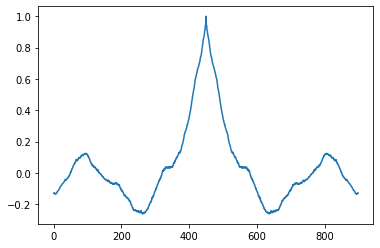

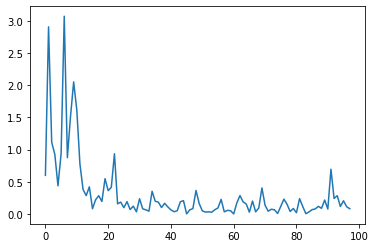

3.0707844104786877 2.9060668175360456
waiting x1


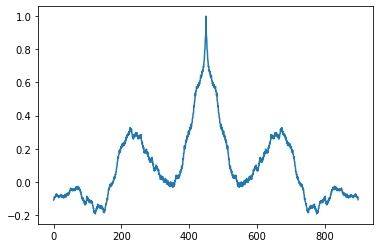

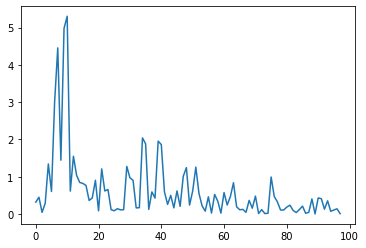

5.302876764900213 4.4542158770545655
waiting x2


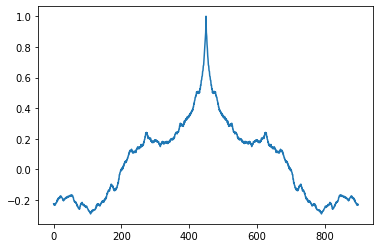

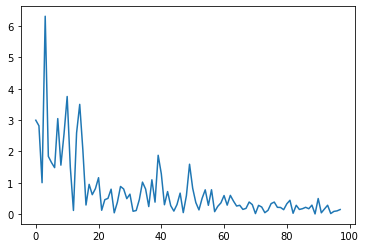

6.318151020781217 3.7539153495926376
estimated heartrate x0 50.0


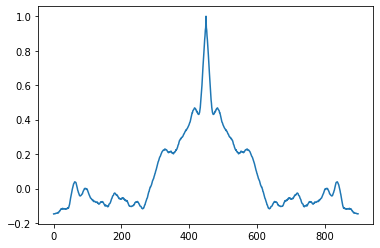

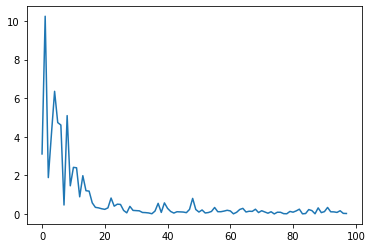

10.248407397459431 6.3564036563457815
waiting x1


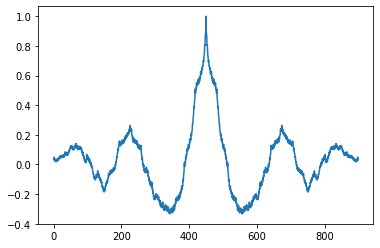

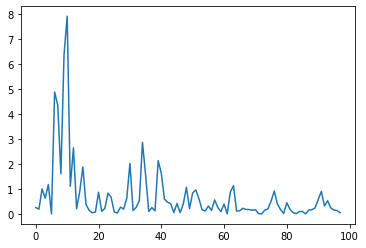

7.904323532874488 4.8741922359036245
waiting x2


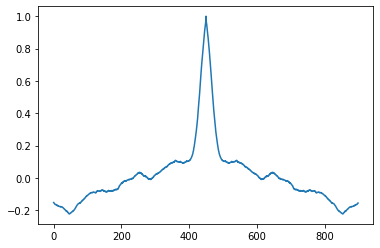

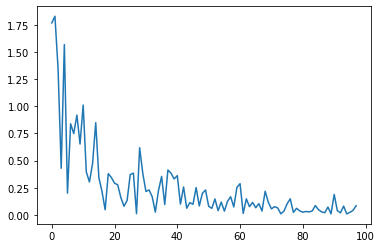

1.8301405085964706 1.5691331485940778
waiting x0


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


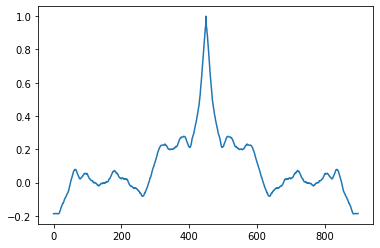

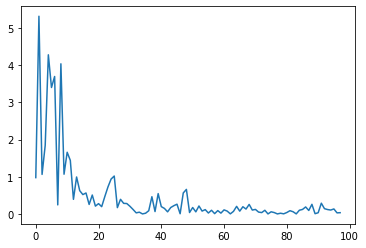

5.317702749459377 4.281118550429359
waiting x1


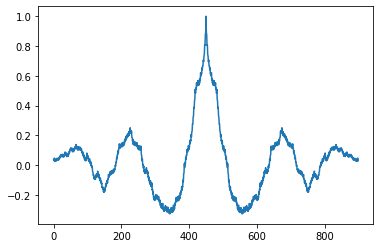

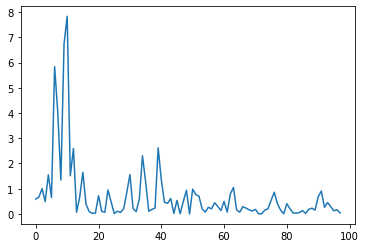

7.837869935109409 5.840419024858478
waiting x2


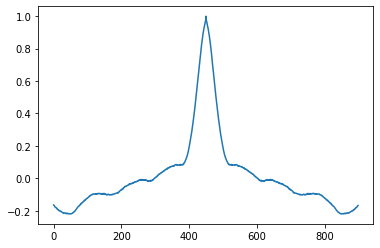

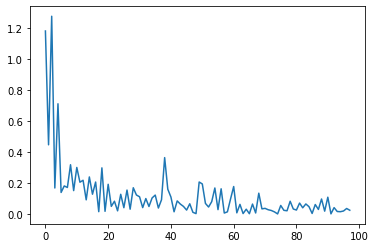

1.2754055368494686 0.710806540860495
estimated heartrate x0 48.0


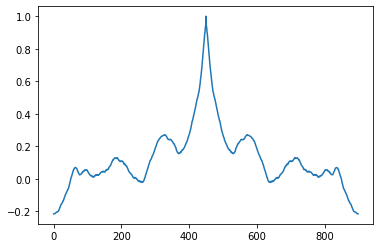

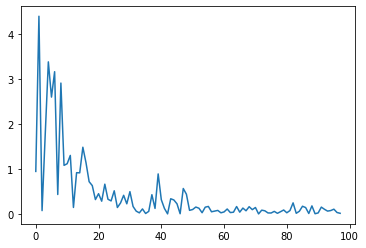

4.389992542303203 3.3770619817027034
waiting x1


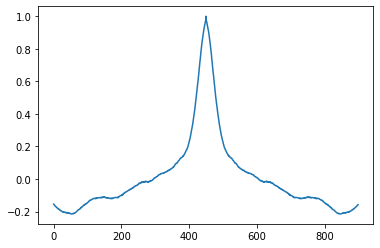

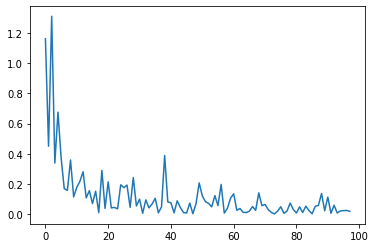

1.312053472064679 0.6759966248024195
estimated heartrate x2 48.0


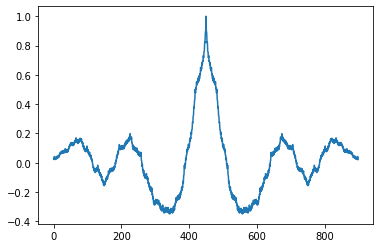

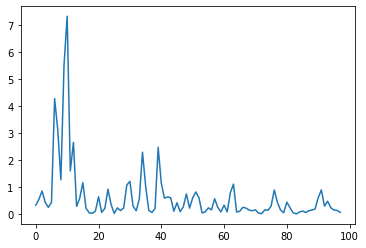

7.3143841395843605 4.2714715531477365
estimated heartrate x0 64.0


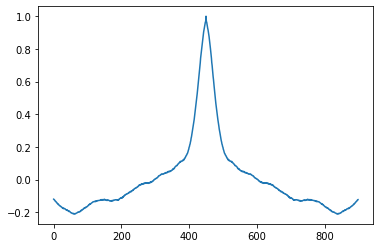

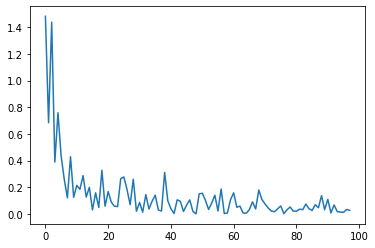

1.4833393850618917 1.4392381097912543
waiting x1


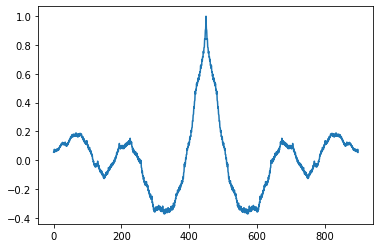

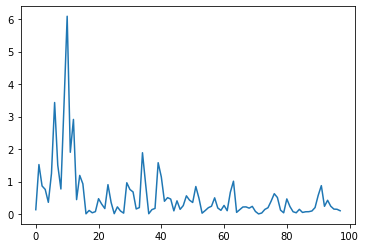

6.090825785107621 3.4332503028747805
estimated heartrate x2 64.0


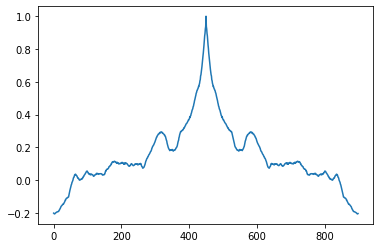

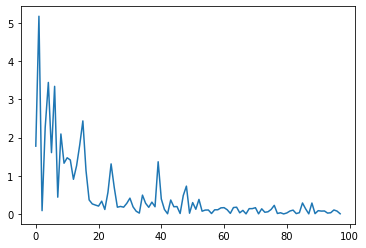

5.17349054381658 3.44136946015378
waiting x0


/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


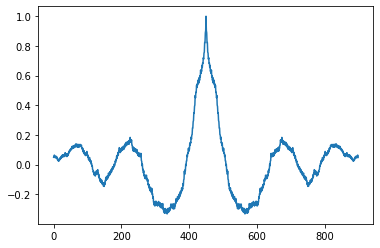

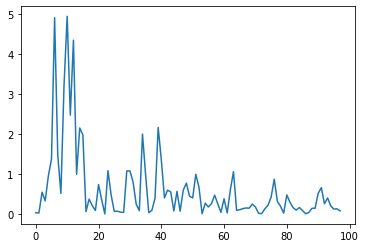

4.944527946733834 4.907443129133272
waiting x1


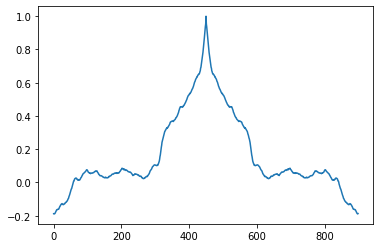

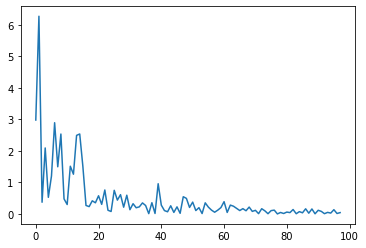

6.274325274951343 2.8949377762951416
estimated heartrate x2 46.0


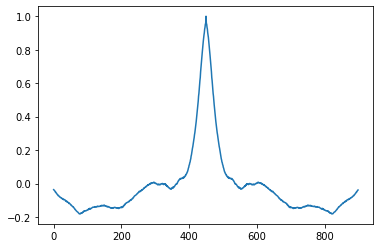

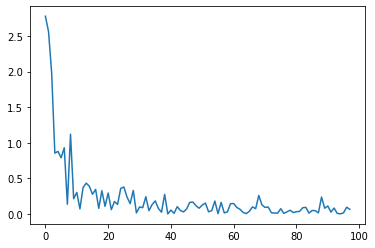

2.7765144249821723 1.9713817370511817
waiting x0


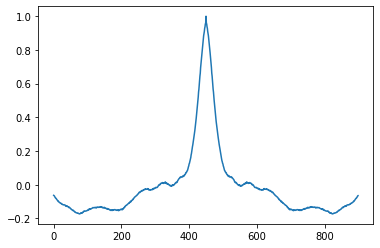

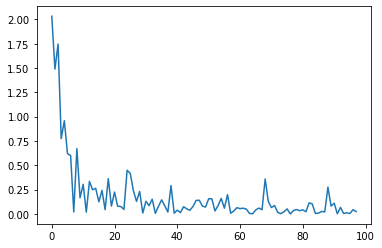

2.0318781024525965 1.7465585793139047
waiting x1


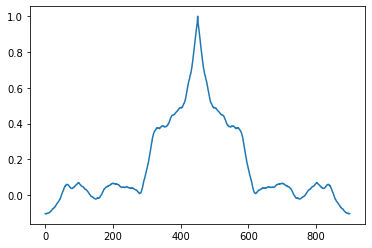

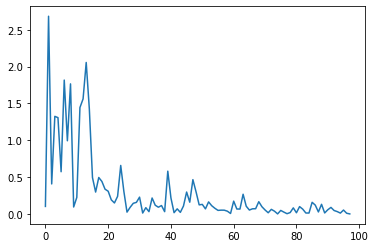

2.6843960671408236 2.0567656392287827
waiting x2


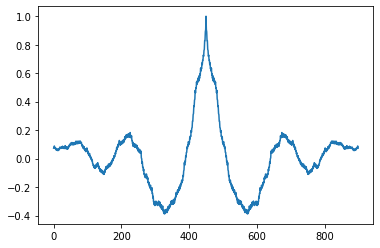

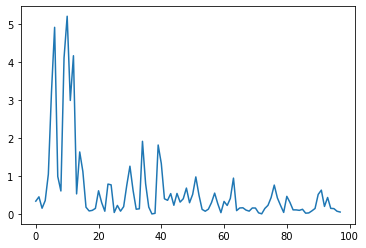

5.2140941291547005 4.922151612892704
waiting x0


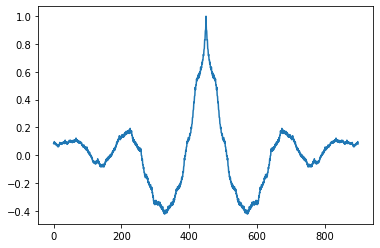

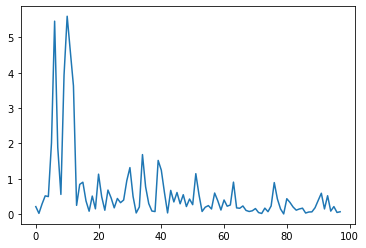

5.59667613236541 5.4572099342178655
waiting x1


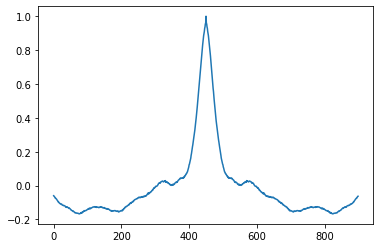

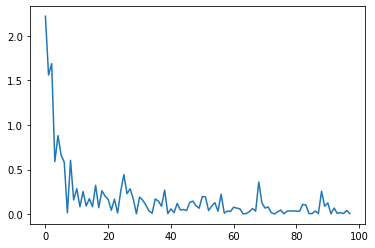

2.2190318810390512 1.6875187654062034
waiting x2


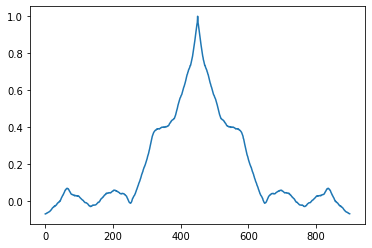

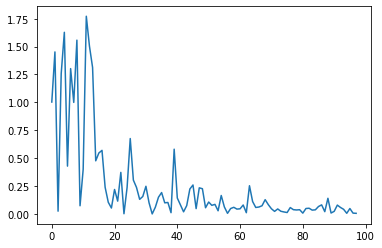

1.771682725610686 1.6278635609694276
waiting x0


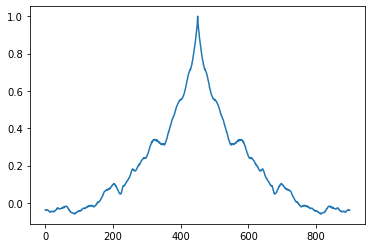

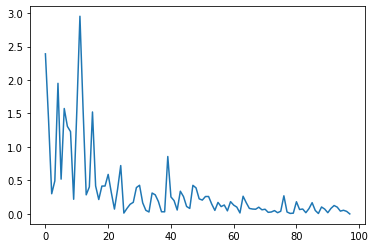

2.951808699624274 2.390349222787061
waiting x1


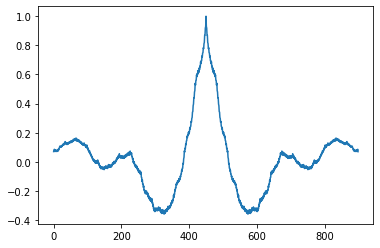

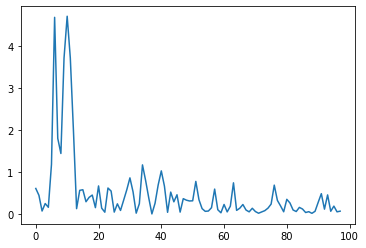

4.710707873066594 4.684733039217528
waiting x2


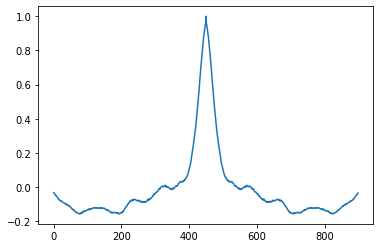

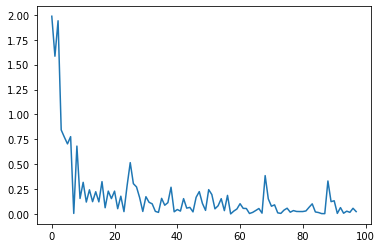

1.9865322444034768 1.9411345309522976
waiting x0


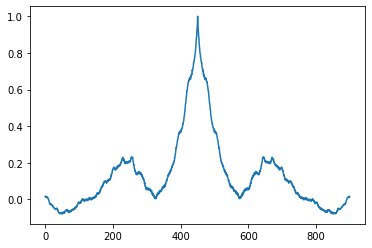

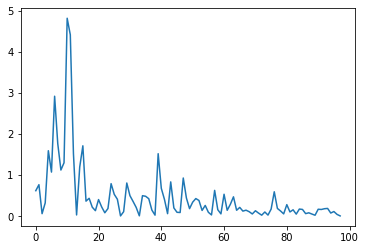

4.8126770571638 2.9140846823191144
waiting x1


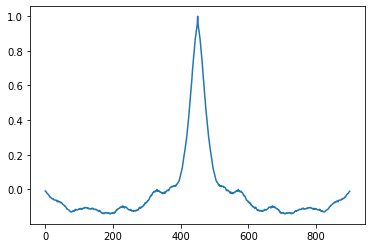

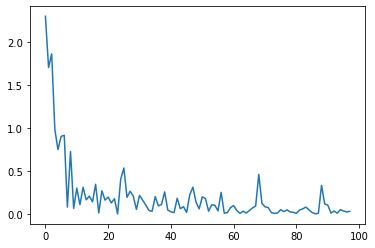

2.3018927952896857 1.8638948366699484
waiting x2


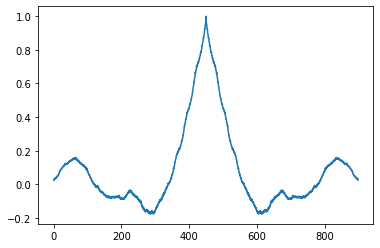

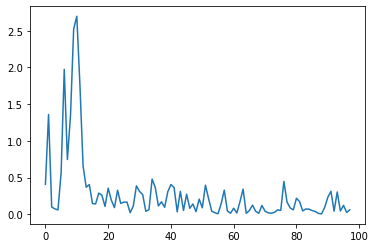

2.6970049954511928 1.9739527880120484
waiting x0


In [42]:
#normalize over 30s windows as in Poe et al.
n30 = int((n_frames - 900)/30) #number of 30 second sliding windows
ran = np.zeros(900)
gan = np.zeros(900)
ban = np.zeros(900)
for i in range(n30):
  rav = np.mean(ra[i*30:i*30+900])
  gav = np.mean(ga[i*30:i*30+900])
  bav = np.mean(ba[i*30:i*30+900])
  rstd = np.std(ra[i*30:i*30+900])
  gstd = np.std(ga[i*30:i*30+900])
  bstd = np.std(ba[i*30:i*30+900])
  for j in range(900):
    ran[j] = (ra[i*30 + j] - rav)/rstd
    gan[j] = (ga[i*30 + j] - gav)/gstd
    ban[j] = (ba[i*30 + j] - bav)/bstd
  X = np.array(list(zip(ran,gan,ban)))
  X_transformed = transformer.fit_transform(X)
  X_indep = X_transformed.transpose()
  #plt.plot(X_indep[0])
  #plt.show()
  #plt.plot(X_indep[1])
  #plt.show()
  #plt.plot(X_indep[2])
  #plt.show()


  x1 = X_indep[1]
  x1_corr = signal.correlate(x1, x1, mode='same')
  plt.plot(x1_corr)
  plt.show()
  ff = np.fft.hfft(x1_corr[:int(len(x1_corr)/2)])
  fs_n = 30/len(x1_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.6*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate x1", hr1)
  else:
    print("waiting x1")


  x2 = X_indep[2]
  x2_corr = signal.correlate(x2, x2, mode='same')
  plt.plot(x2_corr)
  plt.show()
  ff = np.fft.hfft(x2_corr[:int(len(x2_corr)/2)])
  fs_n = 30/len(x2_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.6*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate x2", hr1)
  else:
    print("waiting x2")


  x0 = X_indep[0]
  x0_corr = signal.correlate(x0, x0, mode='same')
  plt.plot(x0_corr)
  plt.show()
  ff = np.fft.hfft(x0_corr[:int(len(x0_corr)/2)])
  fs_n = 30/len(x0_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.6*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate x0", hr1)
  else:
    print("waiting x0")

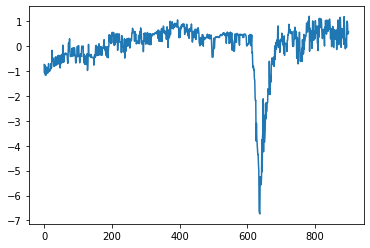

In [39]:
plt.plot(ran)

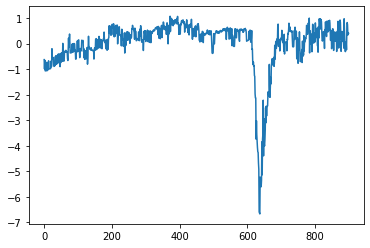

In [40]:
plt.plot(gan)

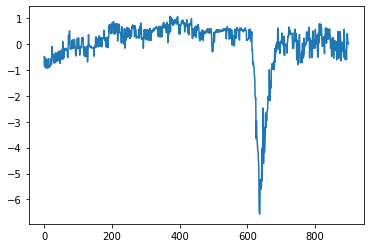

In [41]:

plt.plot(ban)